## **1. [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)**
>>>  #### **[Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)**

In [1]:
%%capture
!pip install mglearn
import mglearn

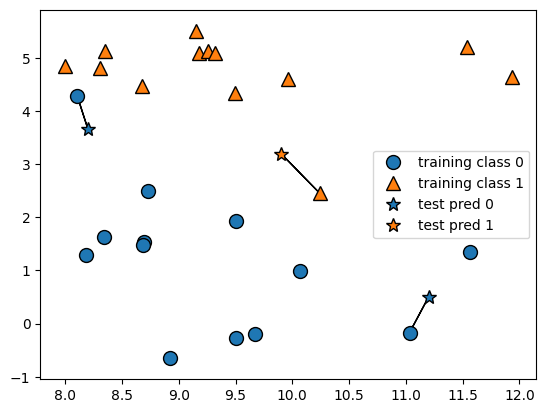

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

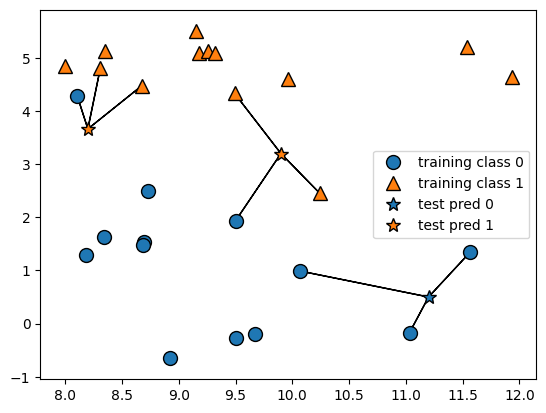

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

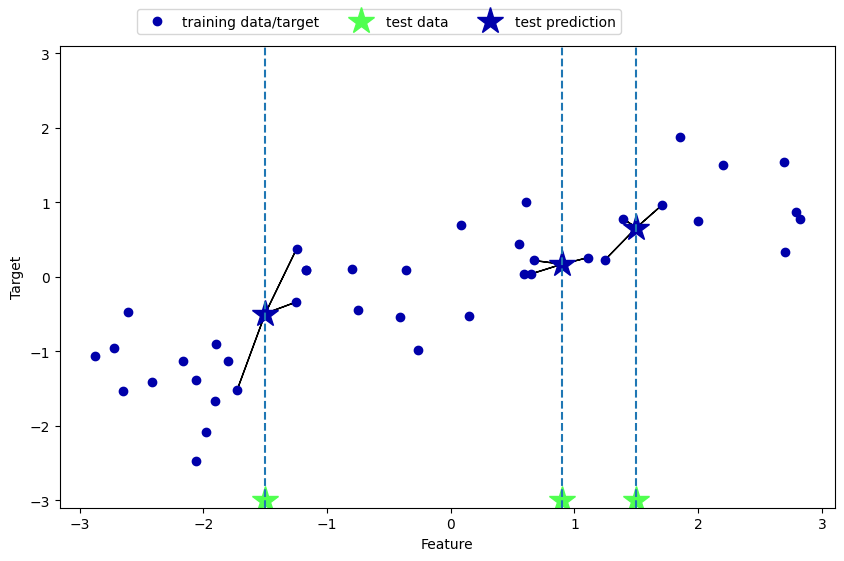

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

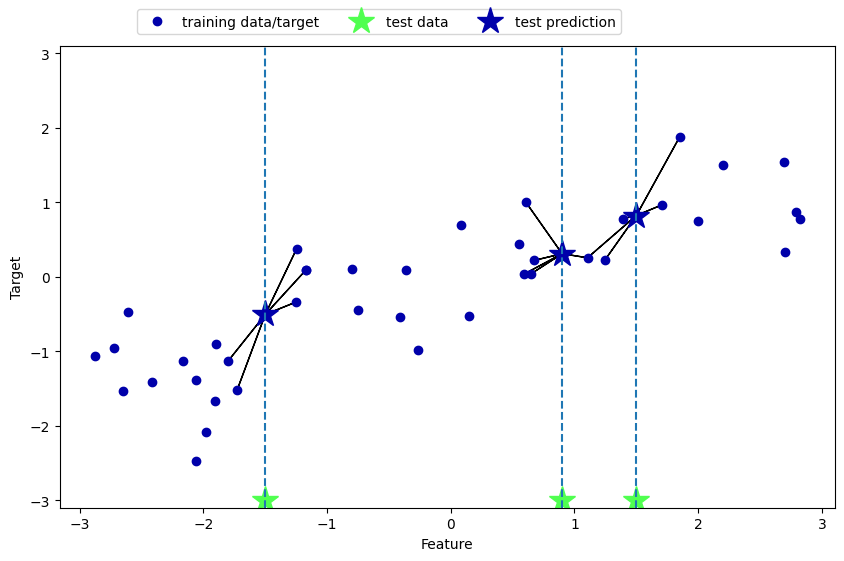

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

### **Excel 예제 그림**

In [ ]:
x = [3.394, 3.110, 1.344, 3.582, 2.280, 7.423, 5.745, 9.172, 7.793, 7.940] # x1
y = [2.331, 1.782, 3.368, 4.679, 2.867, 4.697, 3.534, 2.511, 3.424, 0.792] # x2
label = [0,0,0,0,0,1,1,1,1,1]

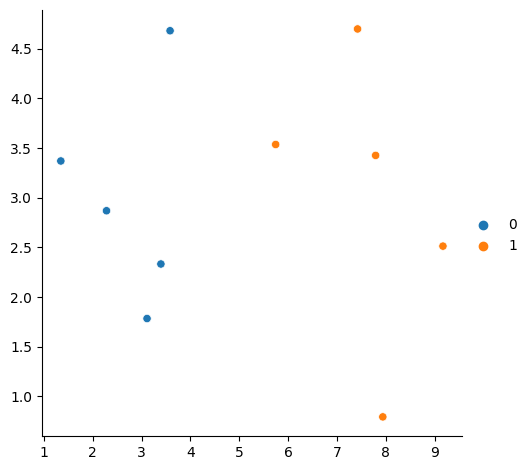

In [ ]:
import seaborn as sns
sns.relplot(x=x, y=y, hue=label)

In [ ]:
import numpy as np
X = np.c_[x,y]
y = np.array(label)

In [ ]:
X.shape  # 다변량, multivariates

(10, 2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) # machine learning, training, fitting 훈련과 학습(과거데이터로)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X

array([[3.394, 2.331],
       [3.11 , 1.782],
       [1.344, 3.368],
       [3.582, 4.679],
       [2.28 , 2.867],
       [7.423, 4.697],
       [5.745, 3.534],
       [9.172, 2.511],
       [7.793, 3.424],
       [7.94 , 0.792]])

#### **새로운 데이터(5,3)을 분류(Classification) 예측하면?**

In [ ]:
new_data = np.array([[5,3]])
new_data

array([[5, 3]])

In [ ]:
new_data.shape

(1, 2)

In [ ]:
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.predict(new_data)

array([0])

In [ ]:
neigh.predict_proba(new_data)
# Prob(new_data=0) = 0.66666667
# Prob(new_data=1) = 0.33333333

array([[0.66666667, 0.33333333]])

#### **과거 데이터 그대로 예측하면 100% 예측하게 된다.**

In [ ]:
neigh.predict(X), neigh.predict_proba(X)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

정확도: 0.9666666666666667


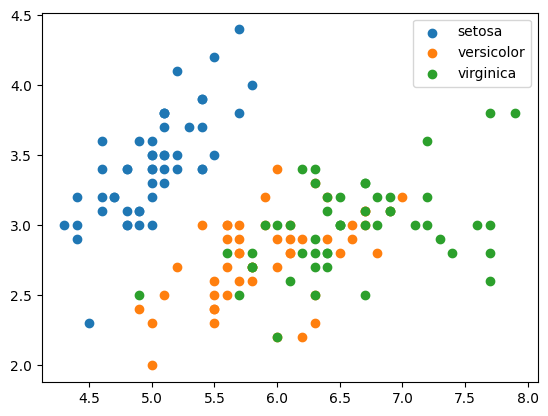

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# 데이터 세트 로드
iris = load_iris()
X = iris.data
y = iris.target

# KNN 분류기 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X, y)

# 예측
predictions = knn.predict(X)

# 정확도 계산
accuracy = np.mean(predictions == y)
print("정확도:", accuracy)

# 결과 시각화
for i in range(len(iris.target_names)):
    index = np.where(y == i)[0]
    plt.scatter(X[index, 0], X[index, 1], label=iris.target_names[i])

plt.legend()
plt.show()


정확도: 0.9666666666666667


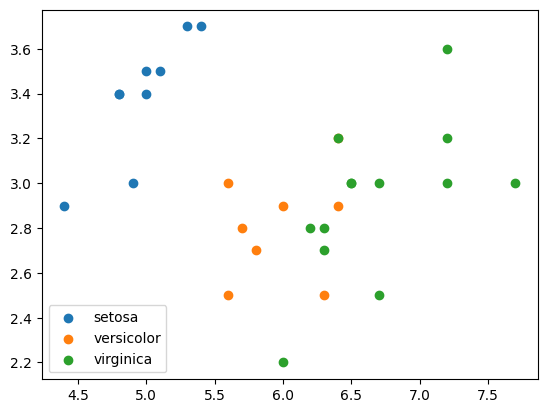

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터 세트 로드
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 데이터와 검증 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #, random_state=42)

# KNN 분류기 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X_train, y_train)

# 예측
predictions = knn.predict(X_val)

# 정확도 계산
accuracy = np.mean(predictions == y_val)
print("정확도:", accuracy)

# 결과 시각화
for i in range(len(iris.target_names)):
    index = np.where(y_val == i)[0]
    plt.scatter(X_val[index, 0], X_val[index, 1], label=iris.target_names[i])

plt.legend()
plt.show()


### **간단한 예제**

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [ ]:
X.shape

(6, 2)

In [ ]:
X[:, 1]

array([-1, -1, -2,  1,  1,  2])

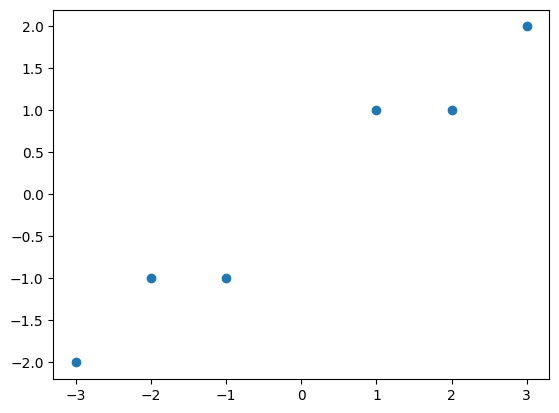

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 2).fit(X) # NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [ ]:
nbrs.kneighbors(X)

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356]]),
 array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 4]]))

In [ ]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [ ]:
import pandas as pd
data = pd.DataFrame(X, columns =['x1', 'x2'])
data['이웃_인덱스'] = indices[:, 1]
data['거리'] = distances[:, 1]
data

,x1,x2,이웃_인덱스,거리
0,-1,-1,1,1.000000
1,-2,-1,0,1.000000
2,-3,-2,1,1.414214
3,1,1,4,1.000000
4,2,1,3,1.000000
5,3,2,4,1.414214


In [ ]:
# 2번과 1번 거리
2**0.5

1.4142135623730951

In [ ]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

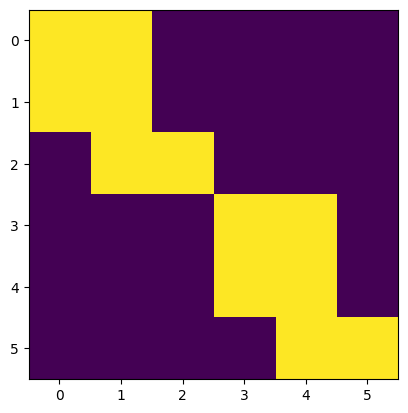

In [ ]:
plt.imshow(nbrs.kneighbors_graph(X).toarray())

In [ ]:
pd.DataFrame(nbrs.kneighbors_graph(X).toarray())

,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
nbrs.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'radius': 1.0}

In [ ]:
nbrs.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'radius': 1.0}

#### **3개 이웃인 경우**



In [ ]:
nbrs = NearestNeighbors(n_neighbors = 4).fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1, 2, 3],
       [1, 0, 2, 3],
       [2, 1, 0, 3],
       [3, 4, 5, 0],
       [4, 3, 5, 0],
       [5, 4, 3, 0]])

In [ ]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.]])

## **2. K-Nearest Neighbors Classifier**
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- **[K-Nearest Neighbors Demo, Stanford Univ.](http://vision.stanford.edu/teaching/cs231n-demos/knn/)**

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
new_point = 1.5
print(neigh.predict([[new_point]]))
print(neigh.predict_proba([[new_point]]))

[0]
[[0.66666667 0.33333333]]


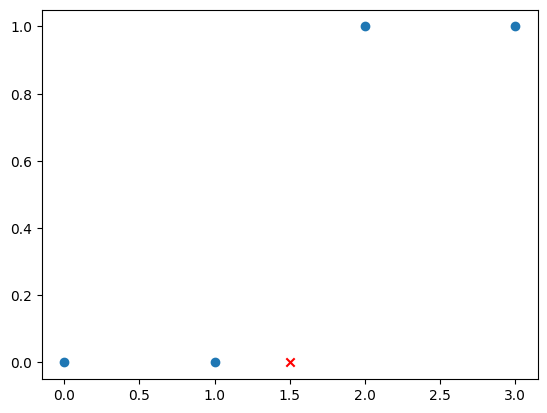

In [ ]:
plt.scatter(X,y)
plt.scatter(new_point, 0, c='red', marker='x', label='Additional Point')

In [ ]:
[neigh.predict([[new_point]]) for new_point in np.arange(1,2, 0.1)]

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1])]

In [ ]:
[neigh.predict_proba([[new_point]]) for new_point in np.arange(1,2, 0.1)]

[array([[0.66666667, 0.33333333]]),
 array([[0.66666667, 0.33333333]]),
 array([[0.66666667, 0.33333333]]),
 array([[0.66666667, 0.33333333]]),
 array([[0.66666667, 0.33333333]]),
 array([[0.33333333, 0.66666667]]),
 array([[0.33333333, 0.66666667]]),
 array([[0.33333333, 0.66666667]]),
 array([[0.33333333, 0.66666667]]),
 array([[0.33333333, 0.66666667]])]

## **3. KNN Regressor**

>> ### **3.1 [Nearest Neighbors regression](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)**

>>> #### **Generate sample data**

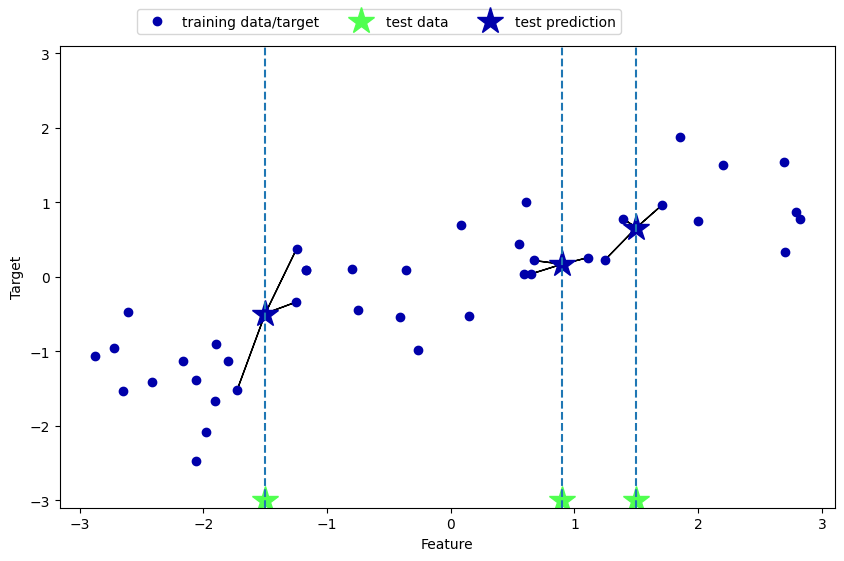

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

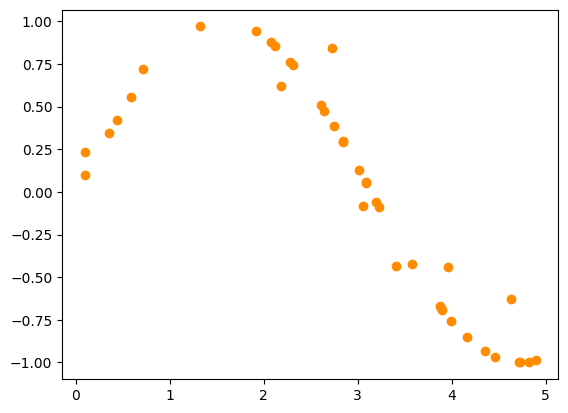

In [ ]:
plt.scatter(X, y, color="darkorange", label="data")

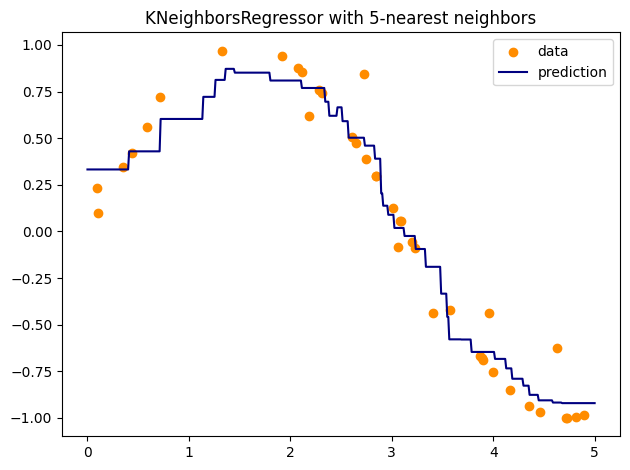

In [ ]:
n_neighbors = 5

knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title(f"KNeighborsRegressor with {n_neighbors}-nearest neighbors")

plt.tight_layout()
plt.show()

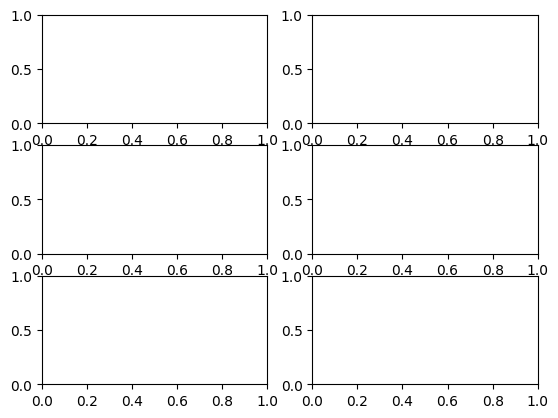

In [ ]:
 for i in range(6):
    plt.subplot(3, 2, i+1)

>>> #### **<font color='brown'>최근접 이웃의 갯수가 적을수록 과적합(Overfitting), High Variance가 된다는 것을 이해**

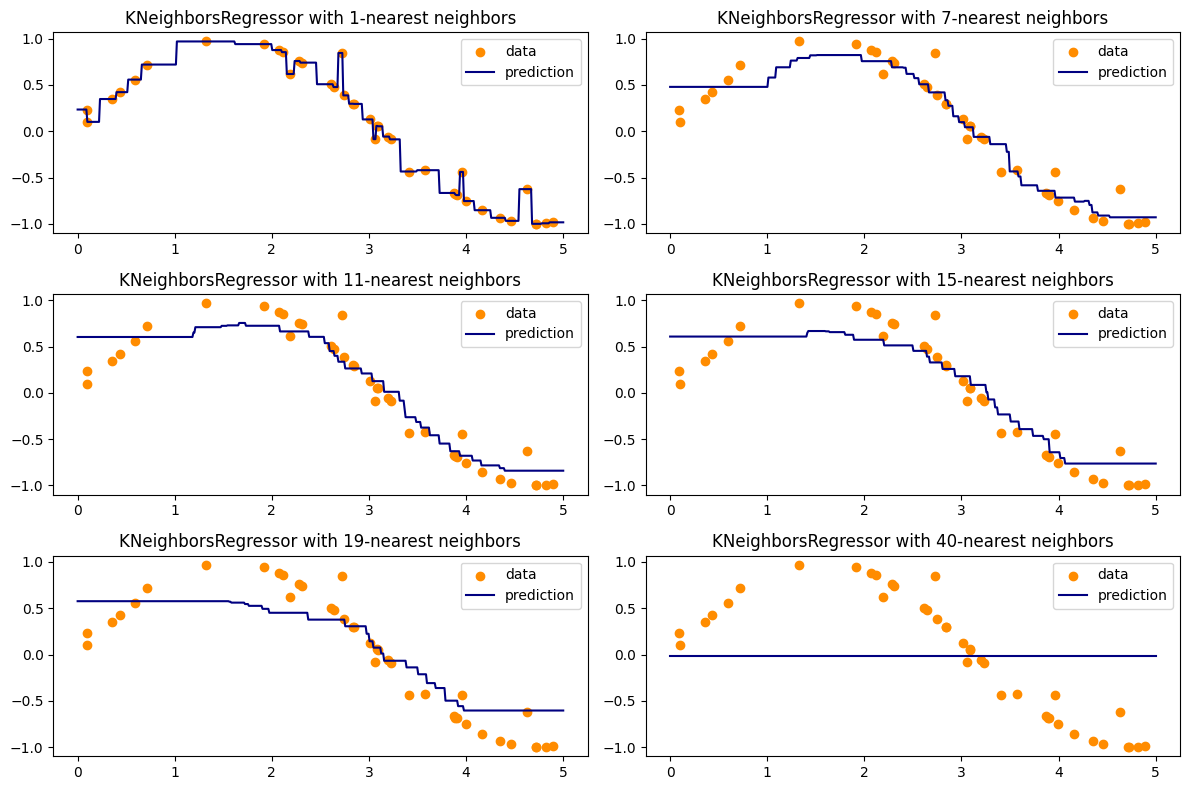

In [ ]:
# 그림의 크기를 12x8 인치로 설정
plt.figure(figsize=(12, 8))

# 반복문 시작
for i, n_neighbors in enumerate([1, 7, 11, 15, 19, 40]):
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    y_ = knn.fit(X, y).predict(T)

    # 3x2 그래프 중 현재 그래프 영역 선택
    plt.subplot(3, 2, i + 1)

    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title(f"KNeighborsRegressor with {n_neighbors}-nearest neighbors")

# 반복문 종료 후 그래프를 표시
plt.tight_layout()
plt.show()


In [ ]:
len(y)

40

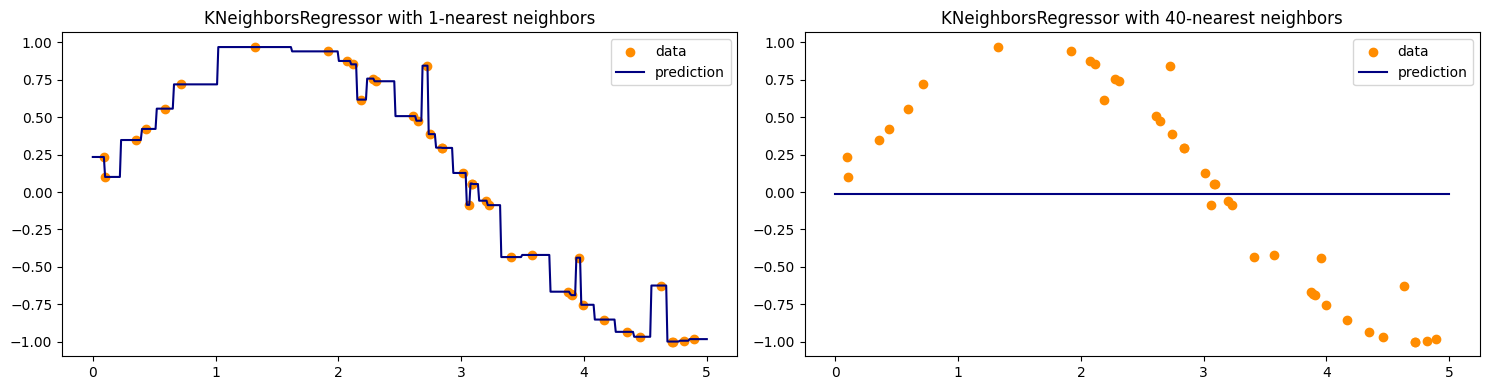

In [ ]:
plt.figure(figsize=(15, 4))

# 반복문 시작
for i, n_neighbors in enumerate([1, 40]):
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    y_ = knn.fit(X, y).predict(T)

    # 3x2 그래프 중 현재 그래프 영역 선택
    plt.subplot(1, 2, i + 1)

    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title(f"KNeighborsRegressor with {n_neighbors}-nearest neighbors")

# 반복문 종료 후 그래프를 표시
plt.tight_layout()
plt.show()


>> ### **3.2 [Face completion with a multi-output estimators](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py)**